In [1]:
import requests as req
from bs4 import BeautifulSoup as bs

In [2]:
# 1. req를 통해서 리뷰 사이트 요청
# 주의점! 응답 코드가 200인지 꼭 확인하기
res = req.get('https://movie.naver.com/movie/bi/mi/point.naver?code=81888')

In [3]:
# 2. 컴퓨터가 이해할 수 있는 언어로 변경(bs)
soup = bs(res.text, 'lxml')

In [4]:
# 3. soup 데이터에서 select를 통해 리뷰 정보만 수집
data = soup.select('div.score_reple > p > span:nth-child(2)')
print(data)

[]


- F12 >> Ctrl + F >> iframe 검색
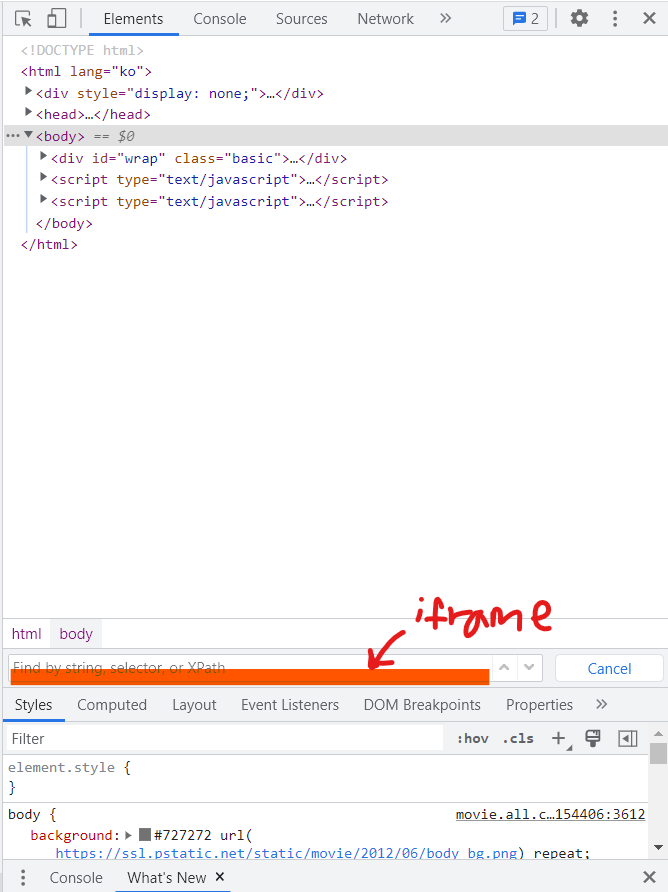

### iframe의 개념!
- iframe은 창을 통해서 다른 서버에 있는 정보를 보여줄 때 사용
#### 찾는 방법
1. F12 개발자도구에서 (Ctrl + F) iframe 검색
2. 실제 사용되는 iframe 찾기(화면에 색이 파란색으로 변경
3. 실제 주소로 찾아가기!(src = "URL")   (src = "about:blank"이면 방법 없음)
    - 카카오맵은 생긴지 얼마 안되어서 데이터가 모두 공개되어 있음
    3.1 url 경로만 있는 경우에는 http://서버주소 까지 입력

In [5]:
res = req.get('https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=81888&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false')

In [6]:
soup = bs(res.text, 'lxml')

- 네이버의 태그와 소스의 태그는 동일함

In [7]:
review = soup.select("div.score_reple > p > span")
# data = soup.select('div.score_reple > p > span:last-child')

In [8]:
# 불필요한 개행 지우는 방법 .strip()
for i in review :
    print(i.text.strip())

관람객
평점 잘 안주는데 만점 줄려고 왔다
관람객
영화관이 필요한 이유
관람객
중국 애들은 불쌍타 나라 잘못 만나서 이런 영화를 극장에서 못보다니 ㅋㅋ
관람객
감동의눈물 나올정도입니다. 평점10점급임.  내가 전투기 탄 기분이였음
관람객
탑건1(1986년)의 36년만의 나온 속편. 매우 만족 스러웠고 매우 재밌었다 무조건 특별관에서 봐야되는 영화 2022년 개봉작 영화중에서 범죄도시2 이후 2번째로 엄청 좋았던 영화 톰 크루즈 미모는 여전히 잘생겼다...
관람객
이 시대의 마지막 액션스타, "톰 크루즈"
관람객
다른 말이 필요한가 레.전.드
관람객
개쩐다 말이 필요없음 직접확인
관람객
감동까지 겸비한 최고의 블록버스터
관람객
지린다... 지려 할말이 없게 만듬..


In [9]:
# 불필요한 관람객이라는 글자들만 삭제(추출)
# extract() > soup데이터에 해당하는 요소들을 추출(제거)한다.
ico = soup.select("span.ico_viewer")
for i in ico :
    i.extract()

In [10]:
review = soup.select("div.score_reple > p > span")
# data = soup.select('div.score_reple > p > span:last-child')

In [11]:
# 불필요한 개행 지우는 방법 .strip()
for i in review :
    print(i.text.strip())

평점 잘 안주는데 만점 줄려고 왔다
영화관이 필요한 이유
중국 애들은 불쌍타 나라 잘못 만나서 이런 영화를 극장에서 못보다니 ㅋㅋ
감동의눈물 나올정도입니다. 평점10점급임.  내가 전투기 탄 기분이였음
탑건1(1986년)의 36년만의 나온 속편. 매우 만족 스러웠고 매우 재밌었다 무조건 특별관에서 봐야되는 영화 2022년 개봉작 영화중에서 범죄도시2 이후 2번째로 엄청 좋았던 영화 톰 크루즈 미모는 여전히 잘생겼다...
이 시대의 마지막 액션스타, "톰 크루즈"
다른 말이 필요한가 레.전.드
개쩐다 말이 필요없음 직접확인
감동까지 겸비한 최고의 블록버스터
지린다... 지려 할말이 없게 만듬..


## 1. 1페이지부터 10페이지까지 수집

In [22]:
for page in range(1, 11) :
    res = req.get(f'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=81888&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={page}')
    soup = bs(res.text, 'lxml')
    ico = soup.select("span.ico_viewer")
    for i in ico :
        i.extract()
    review = soup.select("div.score_reple > p > span")
    for i in review :
        print(i.text.strip())

평점 잘 안주는데 만점 줄려고 왔다
영화관이 필요한 이유
중국 애들은 불쌍타 나라 잘못 만나서 이런 영화를 극장에서 못보다니 ㅋㅋ
감동의눈물 나올정도입니다. 평점10점급임.  내가 전투기 탄 기분이였음
탑건1(1986년)의 36년만의 나온 속편. 매우 만족 스러웠고 매우 재밌었다 무조건 특별관에서 봐야되는 영화 2022년 개봉작 영화중에서 범죄도시2 이후 2번째로 엄청 좋았던 영화 톰 크루즈 미모는 여전히 잘생겼다...
이 시대의 마지막 액션스타, "톰 크루즈"
다른 말이 필요한가 레.전.드
개쩐다 말이 필요없음 직접확인
감동까지 겸비한 최고의 블록버스터
지린다... 지려 할말이 없게 만듬..
영화관에서 탑건 보고 집에 가려고 차 핸들 잡는데 F-18 탄것도 아니면서 쓸데없이 비장해짐
돌아가신 아버지가 탑건1을 좋아하셨는데 살아계시다면 꼭 함께 아이맥스관에서 관람하고 싶었어요 아버지와 함께 보는 기분으로 봤어요
범죄도시2 재미있죠. 그런데 말입니다, 이거 한번 보고 오시죠.비행기 액션 영화인데 가슴이 웅장해지고 눈물 나올뻔함. 아니 진심 울컥했다니까요. 주변에서 눈물 삼키는 소리인지, 에어컨 때문에 추워서 코 훌쩍이는건진 ...
CG시대에 실제 항공기 비행촬영을 한, OTT시대에도 왜 영화관이어야 하는지 새삼 알려준, 헐리우드 영화 황금기 그 시절 극장에서 박수치고 가슴뛰며 보던 그 흥분을 다시 느끼게 해준 영화! 오프닝 탑건 ANTHEM과...
영화 보고 이렇게 기분 좋게 나왔던거 너무 오랜만인것같다 ㅋㅋㅋ
기체 틀때 파일럿의 몸도 제껴 지니 나까지 심장이  터질듯했다. 미친 명화  탄생  10점 밖에  못 줘서  미안하다.탐형님 만수무강하시길
마하10 별점10점!!
매버릭은 낭만 그자체다 우리는 탐크루즈 시대의 살고있다
미친영화 진심 미친영화특히 마지막 15분은 진짜 영화의 대비를 장식하는 역대 최고의 전투기씬. 톰 크루즈 커리어에 영원히 남을 올해 최고의 대작영화는 진짜 이렇게 만들어야 한다최고의 대작!!3번 보고 또 볼 예정
3~40년을 건너뛰어 돌아온

In [25]:
# 반복문의 진행 상황을 체크할 수 있는 라이브러리 (로딩바)
from tqdm import tqdm_notebook as tq

In [26]:
for page in tq(range(1, 54)) :
    res = req.get(f'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=81888&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={page}')
    soup = bs(res.text, 'lxml')
    data = soup.select('div.score_reple > p > span:last-child')
    for i in data :
        print(i.text.strip())  

C:\Users\AI\AppData\Local\Temp\ipykernel_14396\172824921.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tq(range(1, 54)) :


  0%|          | 0/53 [00:00<?, ?it/s]

평점 잘 안주는데 만점 줄려고 왔다
영화관이 필요한 이유
중국 애들은 불쌍타 나라 잘못 만나서 이런 영화를 극장에서 못보다니 ㅋㅋ
감동의눈물 나올정도입니다. 평점10점급임.  내가 전투기 탄 기분이였음
탑건1(1986년)의 36년만의 나온 속편. 매우 만족 스러웠고 매우 재밌었다 무조건 특별관에서 봐야되는 영화 2022년 개봉작 영화중에서 범죄도시2 이후 2번째로 엄청 좋았던 영화 톰 크루즈 미모는 여전히 잘생겼다...
이 시대의 마지막 액션스타, "톰 크루즈"
다른 말이 필요한가 레.전.드
개쩐다 말이 필요없음 직접확인
감동까지 겸비한 최고의 블록버스터
지린다... 지려 할말이 없게 만듬..
영화관에서 탑건 보고 집에 가려고 차 핸들 잡는데 F-18 탄것도 아니면서 쓸데없이 비장해짐
돌아가신 아버지가 탑건1을 좋아하셨는데 살아계시다면 꼭 함께 아이맥스관에서 관람하고 싶었어요 아버지와 함께 보는 기분으로 봤어요
범죄도시2 재미있죠. 그런데 말입니다, 이거 한번 보고 오시죠.비행기 액션 영화인데 가슴이 웅장해지고 눈물 나올뻔함. 아니 진심 울컥했다니까요. 주변에서 눈물 삼키는 소리인지, 에어컨 때문에 추워서 코 훌쩍이는건진 ...
CG시대에 실제 항공기 비행촬영을 한, OTT시대에도 왜 영화관이어야 하는지 새삼 알려준, 헐리우드 영화 황금기 그 시절 극장에서 박수치고 가슴뛰며 보던 그 흥분을 다시 느끼게 해준 영화! 오프닝 탑건 ANTHEM과...
영화 보고 이렇게 기분 좋게 나왔던거 너무 오랜만인것같다 ㅋㅋㅋ
기체 틀때 파일럿의 몸도 제껴 지니 나까지 심장이  터질듯했다. 미친 명화  탄생  10점 밖에  못 줘서  미안하다.탐형님 만수무강하시길
마하10 별점10점!!
매버릭은 낭만 그자체다 우리는 탐크루즈 시대의 살고있다
미친영화 진심 미친영화특히 마지막 15분은 진짜 영화의 대비를 장식하는 역대 최고의 전투기씬. 톰 크루즈 커리어에 영원히 남을 올해 최고의 대작영화는 진짜 이렇게 만들어야 한다최고의 대작!!3번 보고 또 볼 예정
3~40년을 건너뛰어 돌아온

화려한 액션+가끔가다 나오는 코미디+억지스럽지 않은 감동이 어울려져서 너무 재밌었어요. 여태까지 봤던 액션 영화 중에 가장 재밌었던 것 같기도 해요ㅎㅎ 꼭 4DX로 보시는 걸 추천해요!
2022년 최고의 영화
이미 퇴역한지 오랜 기계공학의 정수들의 마지막 비행. 인력은 언젠가 AI, 드론으로 대체 되겠지만, 불완전한 인간만의 로망이 있다.
영화관에서 안보면 후회할 영화
전투기로 보여줄 수 있는건 모두 보여준 2022년 최고의 영화입니다. 용산 아이맥스에서 봤는데 전투기 씬 내내 전율이 가시질 않았어요
할리우드는 이런 영화를 만들기 위해 존재한다는걸 보여준영화
벅차다.... 또 보러 갑니다....
완벽했다 어릴적 TV에서 보던 헐리우드 영화 그 자체를 다시 느끼고옴 ㅎㅎㅎ 재미있습니다
이건 진짜 개 명작이다 가슴이 웅장해진다
아직도 극장에서 이 영화를 안 봤다면 당장 보세요. 이건 극장에서 봐야할 영화지 ott는 절대 아님.
상업영화면 이걸 바이블삼아라~~~군더더기 하나읍다
역대급..말이필요없네요~영화관에서 꼭 보시길 추천드릴게요
너무 재미있어서 영어이름 킴크루즈로 정했습니다. 육군복지근무지원단 출신으로 군부심 느껴졌습니다.
방금 보고 나왔는데.. 지렸다!!! 다시 보러가야지
OTT로 개봉하자는 의견에 절대 안된다고 극장개봉 해야한다고 주장한 톰아저씨에게 감사의 인사를.. 꼭 영화관에서 봐야함
톰크루즈와 주변 인물들간의 감정선과 연출, 영상미에 감탄하면서 봤습니다. 특히 마지막 30분은 제가 파일럿이 되어 몰입해 속도감과 스릴, 통쾌함을 느꼈네요. 탑건1을 안보면 이해가 안되는 장면들이 있어 1을 보고 보...
1편에 대한 예우가 완벽하다
그냥 미쳤어요 .. 꼭 보세요 제발
내인생 최고의 영화 탑건그리고 내인생 최고의 배우 톰 크루즈
높은 기대를 하고 가도 그 이상을 보게될것입니다.
탐오빠 영화 찍어줘서 고마워요. 만수무강 하세요ㅠㅠ
탑건의 속편이 나오기까지 오랜세월이 흘렀지만 톰크루즈 형님은 여전히 카리스마 넘치고, 더 멋있어진것 같은 느낌이 든다.전투기 조종

전투기 액션장면 연출 진짜 압도적인 퀄리티네요...빵빵한 사운드랑 화면에서 보여주는 전투기 비행장면 입체감이 장난 아닙니다.4d나 아이맥스로 꼭 보시는걸 추천함
너무 재미있게 잘봤습니다. 극장의 가치를 증명하는 영상미와 ost 였어요.
탐 크루즈 같이 늙어야 겠다....
늘어지지 않는 확실하고 굵은 스토리에 굵직한 연출과 실감나는 액션. 일반관에서도 빨려들어가는 몰입감. 긴장과 감동의 조화.아쉬웠던 점( 조연들의 출연비율이 아쉬웠음.)하지만 연출력과 연기력으로 커버.
막판에 진짜 재미있네 ㅎㅎ
전투기신은 하나하나 다 머릿속에 박제하고 싶었네요. 멋있는 톰형도 완전 취향저격이었습니다.주말에 가족들과 또 보러 가려구요!
탑건2에 걸맞게 스토리를 잘짠듯. 비행씬 전투씬 연출이 좋아서 영화관 관람 추천합니다.
오랫만에 시간가는 중 모르고 감상했습니다.
더 할 나위 없었다! 올해 최고의 영화!
살다살다 영화관에서 박수 치는 거 처음 봤어요물론 저도 물개박수 침
미쳤어 개재밌음 너무 재밌어서 3번봄
인생 최고의 영화중 하나! 마스터 피스! 토르 때문에 4dx 빨리 내린게 아쉽다..
인류의 문화 유산 +1
하 시기 놓치지 마시고지금 상영할 때 영화관에서 꼭 보시길 바랍니다영화보고 이렇게 감동과 희열을 느끼는건 정말 오랜만이에요
톰크루즈 아저씨가 아니라 오빠다...
진짜 오랜만에 영화다운 영화를 봤다
전형적인 미국식 국뽕 영화지만 밉지 않고 짜릿한 쾌감마저 주는 영화. 4DX영화관에서 보는 걸 추천
오프닝부터 눈물 주룩주룩
올해 최고의 영화
도무지 흠 잡을 수 없다. 10점으론 모자르다. 톰크루즈 커리어 ???? 작품
너무재미있다.... 또 보고 싶어요
4DX로 안 보면 평생후회
10점 만점에 10.4점
정지 상태에서 마하 10까지 거침없이 날아가 관객들 마음 속 표적에 정확히 명중시키는 영화
탑건1을 안 봤다 = 감동100 탑건1 요약만 봤다 = 감동 200 탑건1 정주행 후 봤다 = 감동500
이걸보고나니 문득 마블영화 넘 유치해서 못보겠단 생각이 들었음.. 어벤저스! 